# Using Jupyter Notebook 




>**Exercise 4: Evaluate the potential impact of fossil fuel emissions on atmospheric CO2**
- a) Read Mauna Loa atmopsheric CO2 data (in ppm). What are ppm units?
- b) Read fossil fuel emissions from file: '../DATA/GlobalCarbonProject_2016v1.0_FF.csv' (in PgC/y). What are Peta grams per year?
- c) Compute how much CO2 would accumulate in the atmosphere if all fossil fuel emissions were staying in the atmosphere. Note: this is essentially converting emissions (in PgC/y) to atmospehric CO2 concentration (in ppm). 
- Notes: 
    - The amount of CO2 potentially in the atmosphere after 50 years is the cumulated amount emitted over this time frame
    - What is the molar mass of carbon? (= how much does 1 mole of C weigh?)
    - There are 1.7773e20 moles of air in the atmosphere.
- d) Plot observed CO2 data and cumulated emissions on the same plot. Discuss the result.
- e) Plot the impact of emissions on atmospheric CO2 if only 40%, 50% and 60% of the emissions actually stayed in the atmosphere. Also try 57%.

### Notes

- Consider splitting the CSV file into separate files for each variable, with the header metadata (citation information etc.) left out (so we don't have to skip 57 lines when reading it in).
- For this particular exercise we might consider including a version of the timeseries that was already downsampled (depending on how difficult we want to make the exercise).

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import xarray as xr  # conda install -c conda-forge xarray 
# what does this do?
%matplotlib inline

In [3]:
# Read monthly CO2 measurements.
data = np.loadtxt('monthly_in_situ_co2_mlo.csv', skiprows=57, delimiter=',')
time = data[:, 3]
co2 = data[:, -2]
co2 = np.ma.masked_where(co2 < 0, co2)  # Missing values are encoded as -99.0; we can mask these

In [54]:
# Read annual Fossil Fuel Emissions
raw_ff_emissions = np.loadtxt('GlobalCarbonProject_2016v1.0_FF.csv', skiprows=1)
ff = raw_ff_emissions[:,1]
timeff = raw_ff_emissions[:,0]

In [ ]:
# Convert emissions from PgC/y to ppm

# 1) cummulative emissions
ff_cumul = np.cumsum(ff)

# 2) unit conversion
g_per_Gt = 1.0e15
mol_air_in_atmosphere = 1.7773e20
ppm = 1.0e6 
molar_mass = 12

conversion_factor = g_per_Gt / molar_mass / mol_air_in_atmosphere * ppm


ff_atm = ff_cumul * conversion_factor
#print ff_atm

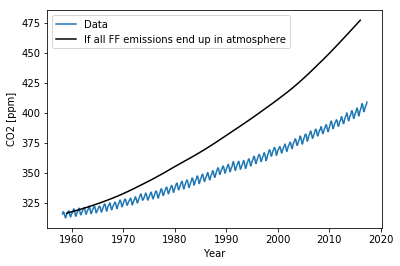

In [58]:
# PLOT Data and impact of emissions on atmosphere
fig, ax = plt.subplots(1, 1)
ax.plot(time, co2, label='Data')
ax.set_xlabel('Year')
ax.set_ylabel('CO2 [ppm]')

co2_t0 = np.mean(co2[0:12])
ax.plot(timeff, ff_atm+co2_t0, label='If all FF emissions end up in atmosphere', color='k')

plt.gca().legend(loc='upper left')

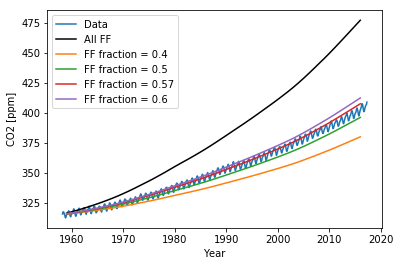

In [55]:
# PLOT Data, impact of emissions on atmosphere and estimate airborne fraction

fig, ax = plt.subplots(1, 1)
ax.plot(time, co2, label='Data')
ax.set_xlabel('Year')
ax.set_ylabel('CO2 [ppm]')

co2_t0 = np.mean(co2[0:12])
ax.plot(timeff, ff_atm+co2_t0, label='All FF', color='k')

for fraction in [0.4, 0.5, 0.57, 0.6]:
    result = fraction * ff_atm + co2_t0
    ax.plot(timeff, result, label='FF fraction = {}'.format(fraction))
plt.gca().legend(loc='upper left')

> **Exercise 5: Plot a 2D map of surface temperature** 

In [18]:
# import cartopy.crs as ccrs  # conda install -c conda-forge cartopy
# from netCDF4 import Dataset

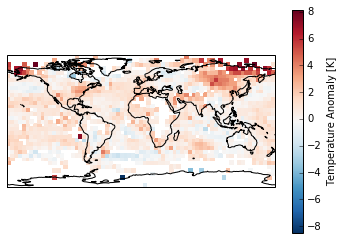

In [32]:
# Using netCDF4-python
# with Dataset('../DATA/HadCRUT.4.5.0.0.median.nc') as ds:
#     temp = ds['temperature_anomaly']
#     lat = ds['latitude']
#     lon = ds['longitude']

#     ax = plt.axes(projection=ccrs.PlateCarree())
#     p = ax.pcolormesh(lon, lat, temp[-1,:,:], transform=ccrs.PlateCarree(), cmap='RdBu_r')
#     ax.coastlines()
#     plt.colorbar(p, label='Temperature Anomaly [K]')

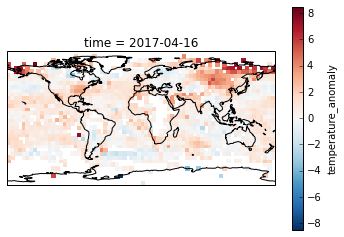

In [16]:
# Here we'll use xarray to load the dataset
# ds = xr.open_dataset('../DATA/HadCRUT.4.5.0.0.median.nc')

# And then use cartopy to plot the result on a map
# ax = plt.axes(projection=ccrs.PlateCarree())
# ds.temperature_anomaly.isel(time=-1).plot(ax=ax, transform=ccrs.PlateCarree())
# ax.coastlines()